In [1]:
import nibabel as nib
import nilearn.plotting as plotting
import nilearn.image as image
import numpy as np

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

/tmp/ipykernel_1824811/4059533610.py:5: UserWarning: Could not determine cut coords: All voxels were masked by the thresholding. Returning the center of mass instead.
  plotting.plot_img(scan_path)


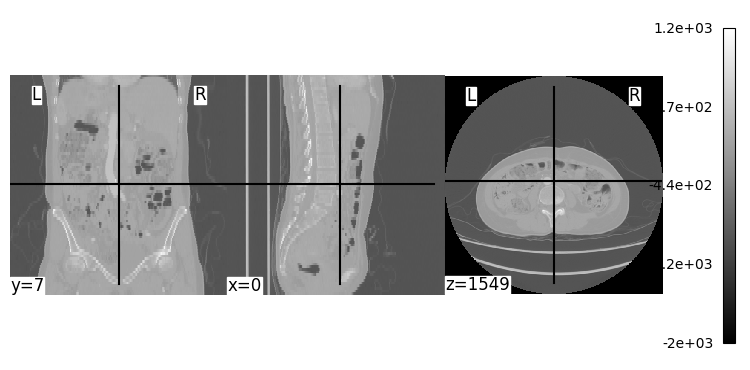

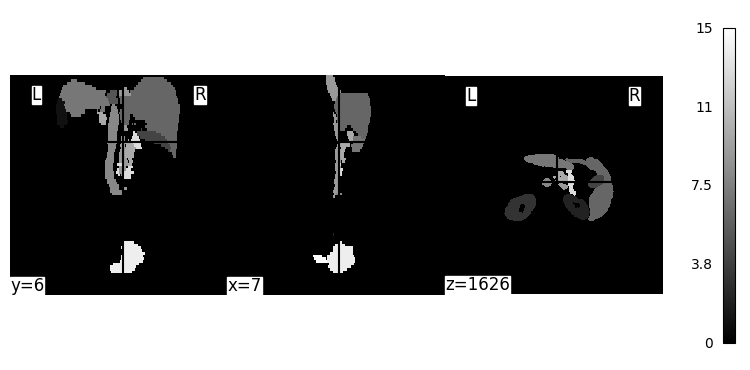

In [10]:
scan_path = 'test_data/amos_val_toy_data/imagesVa/amos_0013.nii.gz'
mask_path = 'test_data/amos_val_toy_data/labelsVa/amos_0013.nii.gz'

# Basic plotting
plotting.plot_img(scan_path)
plotting.plot_img(mask_path)
#plotting.plot_anat('brain_scan.nii.gz')  # For anatomical images
#plotting.plot_stat_map('activation_map.nii.gz')  # For statistical maps

# Interactive viewer (3 orthogonal slices)
# view = plotting.view_img('test_data/amos_val_toy_data/imagesVa/amos_0013.nii.gz')
# view.open_in_browser()

In [ ]:
# Interactive viewer (3 orthogonal slices)
view = plotting.view_img('test_data/amos_val_toy_data/imagesVa/amos_0013.nii.gz')
view.open_in_browser()

In [13]:
img = image.load_img(scan_path)
data = img.get_fdata()
print(f"Shape: {data.shape}, Type: {data.dtype}")

mask_img = image.load_img(mask_path)
data = mask_img.get_fdata()
print(f"Shape: {data.shape}, Type: {data.dtype}")
print(f"Unique mask values: {np.unique(data)}")

Shape: (512, 512, 82), Type: float64
Shape: (512, 512, 82), Type: float64
Unique mask values: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]


In [ ]:
plotting.plot_roi(
    mask_path,
    bg_img=scan_path,
    cmap='cool',  # Colormap for mask
    alpha=0.7,    # Transparency
    title='My ROI Mask'
)

# For multiple masks, use plot_prob_atlas
# plotting.plot_prob_atlas(
#     ['mask1.nii.gz', 'mask2.nii.gz'],
#     bg_img='original_image.nii.gz'
# )

In [ ]:
ct_path = '/PHShome/yl535/project/python/datasets/AeroPath/data/1/1_CT_HR.nii.gz'

# Basic plotting
plotting.plot_img(ct_path)
plotting.plot_anat(
    ct_path,
)
plotting.plot_roi(
    ct_path,  # Use scan as its own "mask"
    bg_img=ct_path,
    cmap='cool',
    alpha=0.7
)

In [ ]:
import os

def get_image_mask_pairs(root_dir, type="airways"):
    """
    Traverses subfolders named [id] and finds matching CT/Mask pairs.
    """
    data_pairs = []
    
    # 1. Get all subfolders in the root directory
    # We filter to ensure we only look at directories
    subfolders = [d for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))]
    
    # 2. Sort them numerically (so we process 1, 2, ... 10, instead of 1, 10, 2)
    # If folder names are not pure integers, this falls back to string sorting
    try:
        subfolders.sort(key=lambda x: int(x))
    except ValueError:
        subfolders.sort()

    print(f"Found {len(subfolders)} patient folders.")

    for case_id in subfolders:
        case_path = os.path.join(root_dir, case_id)
        
        # 3. Construct specific filenames based on the pattern
        # Pattern: [id]_CT_HR.nii.gz AND [id]_CT_HR_label_airways.nii.gz
        img_name = f"{case_id}_CT_HR.nii.gz"
        mask_name = f"{case_id}_CT_HR_label_{type}.nii.gz"
        
        img_full_path = os.path.join(case_path, img_name)
        mask_full_path = os.path.join(case_path, mask_name)
        
        # 4. Verify files exist before adding to list
        if os.path.exists(img_full_path) and os.path.exists(mask_full_path):
            data_pairs.append((img_full_path, mask_full_path))
        else:
            print(f"Warning: Missing files in folder {case_id}")
            # Optional: Check which one is missing for debugging
            if not os.path.exists(img_full_path): print(f"  - Missing: {img_name}")
            if not os.path.exists(mask_full_path): print(f"  - Missing: {mask_name}")

    return data_pairs

# --- Usage ---
input_folder = "/PHShome/yl535/project/python/datasets/AeroPath/data"  # Replace with your actual path

pairs = get_image_mask_pairs(input_folder)

print(f"\nSuccessfully loaded {len(pairs)} pairs.")

# Example loop to process them
for img_path, mask_path in pairs:
    print(f"Processing: {os.path.basename(img_path)}")
    print(f"Processing: {os.path.basename(mask_path)}")
    # Here you can call your processing function, e.g.:
    # segment_and_crop_objects(img_path, mask_path)

Found 27 patient folders.

Successfully loaded 27 pairs.
Processing: 1_CT_HR.nii.gz
Processing: 1_CT_HR_label_airways.nii.gz
Processing: 2_CT_HR.nii.gz
Processing: 2_CT_HR_label_airways.nii.gz
Processing: 3_CT_HR.nii.gz
Processing: 3_CT_HR_label_airways.nii.gz
Processing: 4_CT_HR.nii.gz
Processing: 4_CT_HR_label_airways.nii.gz
Processing: 5_CT_HR.nii.gz
Processing: 5_CT_HR_label_airways.nii.gz
Processing: 6_CT_HR.nii.gz
Processing: 6_CT_HR_label_airways.nii.gz
Processing: 7_CT_HR.nii.gz
Processing: 7_CT_HR_label_airways.nii.gz
Processing: 8_CT_HR.nii.gz
Processing: 8_CT_HR_label_airways.nii.gz
Processing: 9_CT_HR.nii.gz
Processing: 9_CT_HR_label_airways.nii.gz
Processing: 10_CT_HR.nii.gz
Processing: 10_CT_HR_label_airways.nii.gz
Processing: 11_CT_HR.nii.gz
Processing: 11_CT_HR_label_airways.nii.gz
Processing: 12_CT_HR.nii.gz
Processing: 12_CT_HR_label_airways.nii.gz
Processing: 13_CT_HR.nii.gz
Processing: 13_CT_HR_label_airways.nii.gz
Processing: 14_CT_HR.nii.gz
Processing: 14_CT_HR_la

In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

def get_object_middle_index(mask_data, label_id, axis=2):
    """
    Function 1: Determines the middle slice index for a SPECIFIC object label.
    It finds the bounding box of the label and calculates the center.
    """
    # Find the indices where the mask equals the current label
    # np.where returns a tuple of arrays (z, y, x)
    object_indices = np.where(mask_data == label_id)
    
    # Check if object exists
    if len(object_indices[0]) == 0:
        return None
        
    # Get indices for the specific axis
    axis_indices = object_indices[axis]
    
    # Calculate center: (min + max) // 2
    min_idx = np.min(axis_indices)
    max_idx = np.max(axis_indices)
    
    middle_index = (min_idx + max_idx) // 2
    
    return middle_index

def extract_all_objects_middle_slices(intensity_nii_path, mask_nii_path, axis=2):
    """
    Function 2: Iteratively obtains the segmented object from the middle slice 
    of each unique label found in the mask.
    Returns a Dictionary: { label_id: 2D_numpy_array }
    """
    # Load data
    img_nii = nib.load(intensity_nii_path)
    mask_nii = nib.load(mask_nii_path)
    
    img_data = img_nii.get_fdata()
    mask_data = mask_nii.get_fdata()
    
    # Handle 4D images (take first volume)
    if img_data.ndim == 4:
        img_data = img_data[..., 0]

    # Find all unique objects (excluding background 0)
    unique_labels = np.unique(mask_data)
    object_ids = unique_labels[unique_labels != 0].astype(int)
    
    results = {}
    
    print(f"Found {len(object_ids)} objects. Extracting middle slices...")
    
    for label_id in object_ids:
        # 1. Determine the middle slice for this specific object
        mid_idx = get_object_middle_index(mask_data, label_id, axis)
        
        if mid_idx is None:
            continue
            
        # 2. Slice the arrays
        if axis == 0:
            slice_img = img_data[mid_idx, :, :]
            slice_mask = mask_data[mid_idx, :, :]
        elif axis == 1:
            slice_img = img_data[:, mid_idx, :]
            slice_mask = mask_data[:, mid_idx, :]
        else: # axis == 2
            slice_img = img_data[:, :, mid_idx]
            slice_mask = mask_data[:, :, mid_idx]
            
        # 3. Apply mask (Segment the object)
        # Only keep pixels belonging to THIS label
        segmented_slice = np.where(slice_mask == label_id, slice_img, 0)
        
        # 4. Optional: Crop 2D to remove excess black background
        # This makes visualization much better
        non_zero = np.argwhere(segmented_slice)
        if non_zero.size > 0:
            top_left = non_zero.min(axis=0)
            bottom_right = non_zero.max(axis=0)
            segmented_slice = segmented_slice[top_left[0]:bottom_right[0]+1, top_left[1]:bottom_right[1]+1]
            
        results[label_id] = segmented_slice
        
    return results

def visualize_segmented_object(segmented_slice, label_id):
    """
    Function 3: Visualizes the segmented object.
    """
    # Rotate for standard orientation
    to_show = np.rot90(segmented_slice)
    
    plt.figure(figsize=(4, 4))
    plt.imshow(to_show, cmap='gray')
    plt.title(f"Object Label: {label_id}")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
ct_path = '/PHShome/yl535/project/python/datasets/AeroPath/data/1/1_CT_HR.nii.gz'
mask_path = '/PHShome/yl535/project/python/datasets/AeroPath/data/1/1_CT_HR_label_lungs.nii.gz'


# Step 1 & 2: Get all objects (returns a dictionary)
# This internally calls Function 1 for every object found
extracted_objects = extract_all_objects_middle_slices(ct_path, mask_path, axis=2)

# Step 3: Loop through the results and visualize
for label_id, slice_data in extracted_objects.items():
    visualize_segmented_object(slice_data, label_id)

Shape: (376, 267, 477), Type: float64
Shape: (376, 267, 477), Type: float64
Unique mask values: [0. 1.]


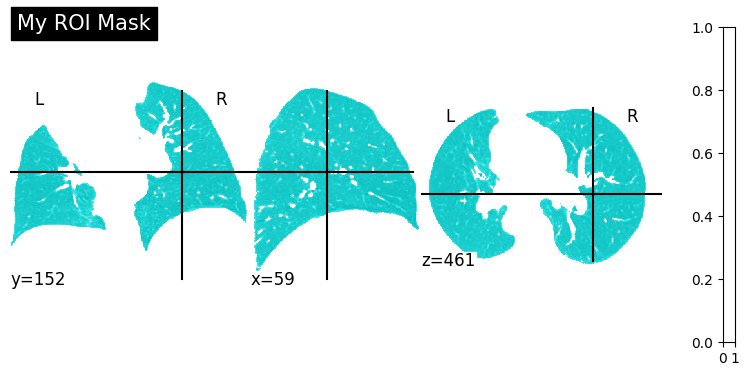

In [2]:
scan_path = '/PHShome/yl535/project/python/datasets/AeroPath/lungs_segmented/8_CT_HR_1.nii.gz'
mask_path = '/PHShome/yl535/project/python/datasets/AeroPath/lungs_segmented/8_CT_HR_1_mask.nii.gz'

img = image.load_img(scan_path)
data = img.get_fdata()
print(f"Shape: {data.shape}, Type: {data.dtype}")

mask_img = image.load_img(mask_path)
data = mask_img.get_fdata()
print(f"Shape: {data.shape}, Type: {data.dtype}")
print(f"Unique mask values: {np.unique(data)}")

plotting.plot_roi(
    mask_path,
    bg_img=scan_path,
    cmap='cool',  # Colormap for mask
    alpha=0.7,    # Transparency
    title='My ROI Mask'
)

In [ ]:
def get_object_middle_index(mask_data, label_id, axis=2):
    """
    Function 1: Determines the middle slice index for a SPECIFIC object label.
    It finds the bounding box of the label and calculates the center.
    """
    # Find the indices where the mask equals the current label
    # np.where returns a tuple of arrays (z, y, x)
    object_indices = np.where(mask_data == label_id)
    
    # Check if object exists
    if len(object_indices[0]) == 0:
        return None
        
    # Get indices for the specific axis
    axis_indices = object_indices[axis]
    
    # Calculate center: (min + max) // 2
    min_idx = np.min(axis_indices)
    max_idx = np.max(axis_indices)
    
    middle_index = (min_idx + max_idx) // 2
    
    return middle_index

def extract_all_objects_middle_slices(intensity_nii_path, mask_nii_path, axis=2):
    """
    Function 2: Iteratively obtains the segmented object from the middle slice 
    of each unique label found in the mask.
    Returns a Dictionary: { label_id: 2D_numpy_array }
    """
    # Load data
    img_nii = nib.load(intensity_nii_path)
    mask_nii = nib.load(mask_nii_path)
    
    img_data = img_nii.get_fdata()
    mask_data = mask_nii.get_fdata()
    
    # Handle 4D images (take first volume)
    if img_data.ndim == 4:
        img_data = img_data[..., 0]

    # Find all unique objects (excluding background 0)
    unique_labels = np.unique(mask_data)
    object_ids = unique_labels[unique_labels != 0].astype(int)
    
    # results = {}
    
    print(f"Found {len(object_ids)} objects. Extracting middle slices...")
    
    for label_id in object_ids:
        # 1. Determine the middle slice for this specific object
        mid_idx = get_object_middle_index(mask_data, label_id, axis)
        
        if mid_idx is None:
            continue
            
        # 2. Slice the arrays
        if axis == 0:
            slice_img = img_data[mid_idx, :, :]
            slice_mask = mask_data[mid_idx, :, :]
        elif axis == 1:
            slice_img = img_data[:, mid_idx, :]
            slice_mask = mask_data[:, mid_idx, :]
        else: # axis == 2
            slice_img = img_data[:, :, mid_idx]
            slice_mask = mask_data[:, :, mid_idx]
            
        # # 3. Apply mask (Segment the object)
        # # Only keep pixels belonging to THIS label
        # segmented_slice = np.where(slice_mask == label_id, slice_img, 0)
        
        # # 4. Optional: Crop 2D to remove excess black background
        # # This makes visualization much better
        # non_zero = np.argwhere(segmented_slice)
        # if non_zero.size > 0:
        #     top_left = non_zero.min(axis=0)
        #     bottom_right = non_zero.max(axis=0)
        #     segmented_slice = segmented_slice[top_left[0]:bottom_right[0]+1, top_left[1]:bottom_right[1]+1]
            
        # results[label_id] = segmented_slice
        
    return slice_img, slice_mask

extracted_scan, extracted_mask = extract_all_objects_middle_slices(scan_path, mask_path, axis=2)



Found 1 objects. Extracting middle slices...


Plotting slice at index 238 (approx 446.50 mm)


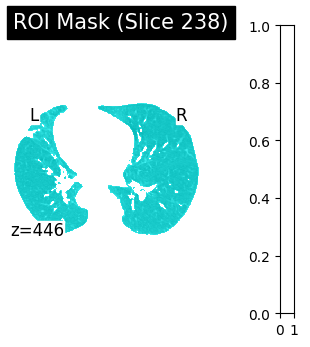

In [ ]:
import nibabel as nib
from nilearn import plotting
import numpy as np

scan_path = '/PHShome/yl535/project/python/datasets/AeroPath/lungs_segmented/8_CT_HR_1.nii.gz'
mask_path = '/PHShome/yl535/project/python/datasets/AeroPath/lungs_segmented/8_CT_HR_1_mask.nii.gz'

# Load data to get shapes
scan_img = nib.load(scan_path)
mask_img = nib.load(mask_path)
data_shape = scan_img.shape

# Calculate the middle slice index
mid_slice_idx = data_shape[2] // 2

# We need to convert the voxel index to world coordinates (mm) for nilearn
# We use the affine matrix for this.
# [x, y, z, 1] dot affine -> [x_mm, y_mm, z_mm, 1]
mid_slice_coords = nib.affines.apply_affine(scan_img.affine, [0, 0, mid_slice_idx])
z_coordinate = mid_slice_coords[2]

print(f"Plotting slice at index {mid_slice_idx} (approx {z_coordinate:.2f} mm)")

plotting.plot_roi(
    mask_path,
    bg_img=scan_path,
    display_mode='z',        # Only plot along the z-axis
    cut_coords=[z_coordinate], # Force the specific Z-coordinate
    cmap='cool',
    alpha=0.7,
    title=f'ROI Mask (Slice {mid_slice_idx}, Axis {})'
)
plotting.show()

Data Shape: (376, 267, 477)
Viewing Axis 2 (Size: 477) -> Slice Index: 238


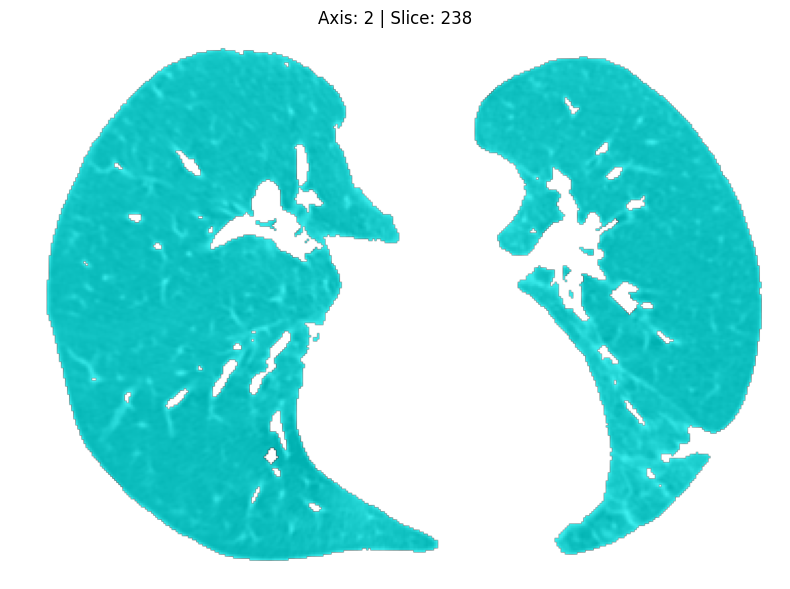

In [2]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

# --- Configuration ---
scan_path = '/PHShome/yl535/project/python/datasets/AeroPath/lungs_segmented/8_CT_HR_1.nii.gz'
mask_path = '/PHShome/yl535/project/python/datasets/AeroPath/lungs_segmented/8_CT_HR_1_mask.nii.gz'

# CHANGE THIS: 0, 1, or 2
VIEW_AXIS = 2  
# ---------------------

# 1. Load Data
scan_obj = nib.load(scan_path)
mask_obj = nib.load(mask_path)

scan_data = scan_obj.get_fdata()
mask_data = mask_obj.get_fdata()

print(f"Data Shape: {scan_data.shape}")

# 2. Calculate Middle Index for the chosen axis
# Get the dimension size for the selected axis
dim_size = scan_data.shape[VIEW_AXIS]
mid_idx = dim_size // 2

print(f"Viewing Axis {VIEW_AXIS} (Size: {dim_size}) -> Slice Index: {mid_idx}")

# 3. Slice the data dynamically using np.take
# This extracts the specific slice regardless of which axis is chosen
scan_slice = np.take(scan_data, mid_idx, axis=VIEW_AXIS)
mask_slice = np.take(mask_data, mid_idx, axis=VIEW_AXIS)

# 4. Orient the image for display
# Medical images (NIfTI) often load such that standard matplotlib plotting looks rotated.
# We usually rotate 90 degrees counter-clockwise to make them "upright".
scan_slice = np.rot90(scan_slice)
mask_slice = np.rot90(mask_slice)

# 5. Create Mask Overlay (Transparent where mask is 0)
masked_overlay = np.ma.masked_where(mask_slice == 0, mask_slice)

# 6. Plot
plt.figure(figsize=(8, 8))
plt.title(f'Axis: {VIEW_AXIS} | Slice: {mid_idx}')

# Plot Background (Scan)
plt.imshow(scan_slice, cmap='gray')

# Plot Overlay (Mask)
plt.imshow(masked_overlay, cmap='cool', alpha=0.7)

plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
import nibabel as nib
import numpy as np
import imageio
import os

def create_gif_from_nii(nii_path, output_gif_path, axis=2, duration=0.1):
    """
    Converts a NIfTI file to a GIF by iterating through slices along a specified axis.

    Args:
        nii_path (str): Path to the input .nii.gz file.
        output_gif_path (str): Path to save the output .gif file.
        axis (int): Axis to slice along (0, 1, or 2).
        duration (float): Duration of each frame in the GIF (seconds).
    """
    # 1. Load NIfTI
    if not os.path.exists(nii_path):
        print(f"Error: File not found at {nii_path}")
        return

    nii = nib.load(nii_path)
    data = nii.get_fdata()

    # 2. Handle 4D data (if time dimension exists, take the first volume)
    if data.ndim == 4:
        print("Warning: Input is 4D. Using the first volume (time=0).")
        data = data[..., 0]

    # 3. Normalize intensity to 0-255 (Critical for visualization)
    # We clip outliers to improve contrast (1st and 99th percentiles)
    vmin, vmax = np.percentile(data, 1), np.percentile(data, 99)
    data = np.clip(data, vmin, vmax)
    
    # Scale to 0-255 range
    if vmax > vmin:
        data = ((data - vmin) / (vmax - vmin) * 255).astype(np.uint8)
    else:
        data = data.astype(np.uint8)

    # 4. Prepare frames
    frames = []
    
    # Determine number of slices along the chosen axis
    num_slices = data.shape[axis]
    
    print(f"Processing {num_slices} slices along axis {axis}...")

    for i in range(num_slices):
        # Extract slice
        if axis == 0:
            slice_img = data[i, :, :]
        elif axis == 1:
            slice_img = data[:, i, :]
        else: # axis == 2
            slice_img = data[:, :, i]

        # Rotate to align correctly (medical images are often rotated in numpy)
        slice_img = np.rot90(slice_img)

        frames.append(slice_img)

    # 5. Save GIF
    print(f"Saving GIF to {output_gif_path}...")
    imageio.mimsave(output_gif_path, frames, duration=duration, loop=0)
    print("Done!")


# Example paths
input_nii = '/PHShome/yl535/project/python/datasets/AeroPath/lungs_segmented/8_CT_HR_1.nii.gz'
output_gif = '/PHShome/yl535/project/python/sam_3d/sam-3d-objects/notebook/scan_animation.gif'

# Axis 0 = Sagittal (Side view)
# Axis 1 = Coronal (Front view)
# Axis 2 = Axial (Top-down view)
create_gif_from_nii(input_nii, output_gif, axis=2, duration=0.05)